In [1]:
import numpy as np
from scipy.special import expit
from numpy import logaddexp
from glopt import GLMProblem
from problems import build_random_logistic,build_logistic_lasso
import matplotlib.pyplot as plt

In [ ]:
f,A,Q,C,c,b = build_random_logistic(m = 10000,n = 500,k = 100,density=0.1, seed = 2)
problem = GLMProblem(f,A,Q,C,c,b)
x,conv = problem.solve()

100 constraints
500 variables
10000 rows in A
────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ cons_viol  │    mu    │    Δx     │   step    │  KKT_res  │ cum_time │
────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 6.9315e+05 │ 6.4184e+00 │  4.9e+02 │  3.63e-01 │ 3.388e-02 │  1.84e+03 │     0.10s │
│    2 │ 6.9872e+05 │ 5.3649e+00 │  1.1e+02 │  5.42e-01 │ 1.641e-01 │  1.48e+04 │     0.17s │
│    3 │ 6.8646e+05 │ 3.6531e+00 │  1.1e+02 │  3.55e-01 │ 3.191e-01 │  1.05e+04 │     0.24s │
│    4 │ 6.5699e+05 │ 9.5659e-01 │  1.4e+01 │  6.61e-01 │ 7.381e-01 │  4.22e+03 │     0.31s │
│    5 │ 6.4226e+05 │ 1.0804e-01 │  1.4e+01 │  3.71e-01 │ 8.871e-01 │  1.31e+03 │     0.39s │
│    6 │ 6.4018e+05 │ 2.6645e-15 │  1.4e-01 │  1.50e-01 │ 1.000e+00 │  3.22e+02 │     0.46s │
│    7 │ 6.3957e+05 │ 3.5527e-15 │  1.4e-01 │  4.55e-02 │ 9.904e-01 │  7.18e+01 │     0.53s │
│    8 │ 6.3857e+

In [44]:
n = 500
lam = 250.
f,A,Q,C,c,b,x_true = build_logistic_lasso(m = 10000,n = n, seed = 2,lam = lam)
problem = GLMProblem(f,A,Q,C,c,b)
xt,conv = problem.solve(verbose = False)
x = xt[:n]

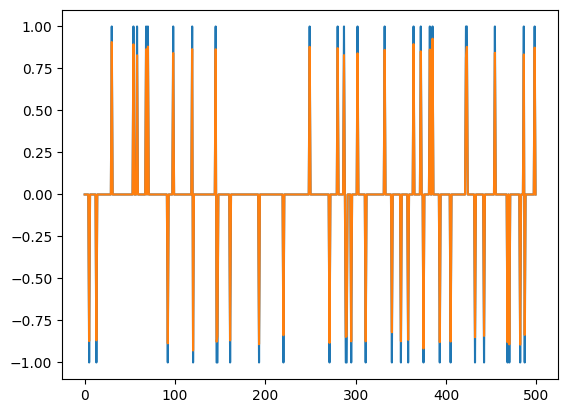

In [45]:
plt.plot(x_true)
plt.plot(x)

In [46]:
import cvxpy as cp
from scipy.sparse import csc_array
A = csc_array(A)[:,:n]
n = A.shape[1]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
neg_log_likelihood = cp.sum(
    cp.multiply(f.w,cp.logistic(A @ beta)- cp.multiply(f.y, A @ beta))
)
regularization = lam*cp.norm1(beta)

problem  = cp.Problem(cp.Minimize(
    (neg_log_likelihood + regularization))
)
problem.solve(verbose = True)

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Apr 18 10:08:32 PM: Your problem has 500 variables, 0 constraints, and 0 parameters.
(CVXPY) Apr 18 10:08:32 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 18 10:08:32 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 18 10:08:32 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 18 10:08:32 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 18 10:08:32 PM: Compiling problem (target solver=CLARABEL).

6895002.804744771

In [47]:
beta.value - x

array([ 1.34265808e-08,  9.35114965e-09, -1.01217303e-08,  1.09785515e-08,
       -4.10017126e-10, -9.25765933e-07, -1.44884156e-08,  4.21586655e-09,
       -9.63034852e-09,  1.42020135e-08,  1.22822143e-09,  8.31120310e-09,
        8.21623340e-10, -2.55792442e-06, -1.27086995e-09,  7.10121834e-09,
       -3.89341429e-08, -8.12517532e-09, -9.11306057e-09, -5.02486714e-09,
        1.65207328e-08,  3.22499648e-09, -5.80635306e-10, -9.14598574e-09,
       -6.17953893e-09, -1.16025300e-08, -1.26827998e-08,  3.08976516e-10,
        9.43296171e-09, -6.84009702e-09,  4.65827380e-06, -2.13449224e-08,
       -3.77439247e-09,  3.19521836e-08, -6.43548452e-09,  1.01632008e-08,
       -5.81425913e-10,  4.38326499e-09,  3.75066090e-09, -1.00789742e-08,
        1.34041948e-08,  5.20615164e-09, -1.91229984e-08,  9.49687353e-10,
       -6.00942407e-09,  1.07385173e-08,  4.95525185e-09,  6.01460940e-09,
       -7.74996554e-09,  1.15448531e-08,  1.11050151e-09,  1.04141727e-08,
        1.45683462e-08,  